# Problem Statement :  
PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them.
#### That means:
- When someone uses an ATM, your model will look at the transaction details in real time.
- If it looks suspicious (fraud), the system will block or decline it. If it looks safe, the system will allow it.
  
- Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. 
- The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.
___________________________________________________________________________________________________________________________________________  
- Training data contains masked variables pertaining to each transaction id .
- Your prediction target here is 'Target'
  
#### 1: Fraudulent transactions 
#### 0: Clean transactions
____________________________________________________________________________________________________________________________________________
## About Data:
#### In training → dataset where:
- Each row = one transaction
- Each column = information (features) about that transaction
#### geo_scores → where the transaction happened
#### Lambda_wts → some internal security weight
#### Qset_tats → network timing data
#### instance_scores → vulnerability level

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
geo= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/Geo_scores.csv')
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [3]:
instance= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/instance_scores.csv')
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [4]:
Lambda_wts= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/Lambda_wts.csv')
Lambda_wts.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [5]:
qset= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/Qset_tats.csv')
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [6]:
train= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/train.csv')
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [7]:
test= pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/test_share.csv')
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


## Pre Processing:-

In [8]:
print('geo' ,geo.shape)
print('--'*15)
print('instance',instance.shape)
print('--'*15)
print('Lambda',Lambda_wts.shape)
print('--'*15)
print('qset',qset.shape)
print('--'*15)
print('train',train.shape)
print('--'*15)
print('test',test.shape)


geo (1424035, 2)
------------------------------
instance (1424035, 2)
------------------------------
Lambda (1400, 2)
------------------------------
qset (1424035, 2)
------------------------------
train (227845, 28)
------------------------------
test (56962, 27)


In [9]:
# its looks inconsistent data shape.
# we need to merge all data without merging data.

In [10]:
geo.info()
print('**' * 20)
print()
instance.info()
print('**' * 20)
print()
Lambda_wts.info()
print('**' * 20)
print()
qset.info()
print('**' * 20)
print()
train.info()
print('**' * 20)
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
****************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
****************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1  

#### Observation:
-  From the above info, all datasets have a common column id except lambda_wt. So first I will merge all datasets on id.
-  After merging, I will have a group column in the combined data.
- Since lambda_wt has a group column as well, I will then merge it using group as the common key.

- once I have done with all the basic cleaning then will do it.

In [11]:
# Missing Value:

print('geo' ,geo.isnull().sum())
print('--'*15)
print('instance',instance.isnull().sum())
print('--'*15)
print('Lambda',Lambda_wts.isnull().sum())
print('--'*15)
print('qset',qset.isnull().sum())
print('--'*15)
print('train',train.isnull().sum())
print('--'*15)
print('test',test.isnull().sum())

geo id               0
geo_score    71543
dtype: int64
------------------------------
instance id                 0
instance_scores    0
dtype: int64
------------------------------
Lambda Group        0
lambda_wt    0
dtype: int64
------------------------------
qset id                           0
qsets_normalized_tat    103201
dtype: int64
------------------------------
train id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
------------------------------
test id          

In [12]:
# geo &qset have missing data

In [13]:
#unique value by id and group,just to to check all cust transaction or same cut multipl time


print(f'{"*"*15},Unique Id of the cust.{"*"*15}')
print()
print('geo------>' ,  geo['id'].nunique())
print('--'*15)
print('instance-->',instance['id'].nunique())
print('--'*15)
print('qset----->',qset['id'].nunique())
print('--'*15)
print('train-->',train['id'].nunique())
print('--'*15)
print('test---->',test['id'].nunique())
print()
print(f'{"*"*15},Unique group of the cust.{"*"*15}')
print('Lambda--->' ,  Lambda_wts['Group'].nunique())
print('train--->',train['Group'].nunique())
print('test--->',test['Group'].nunique())



***************,Unique Id of the cust.***************

geo------> 284807
------------------------------
instance--> 284807
------------------------------
qset-----> 284807
------------------------------
train--> 227845
------------------------------
test----> 56962

***************,Unique group of the cust.***************
Lambda---> 1400
train---> 1301
test---> 915


### Hints: from above

- I see that all trxn level datasets have 284807 unique ID.
- train has 227845 unique IDs and test has 56962 unique ID.
- adding train and test IDs gives 284807, which matches the total unique ID in the full dataset.
- I notice that Lambda has 1400 unique group, train has 1301 groups, and test has 915 groups(1301+915)!=1400.
- This suggests that if I combine train and test, I can merge trxn level datasets on ID, and then merge Lambda on group. for now so will do it little later .

### Missing data handling:
__________________________________________
- geo have missing data will handle this :
- geo-> both columns are number (int,float).

### For Geo:

In [14]:
geo.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [15]:
((geo.isnull().sum()/len(geo))*100).round(2)

id           0.00
geo_score    5.02
dtype: float64

<Axes: ylabel='geo_score'>

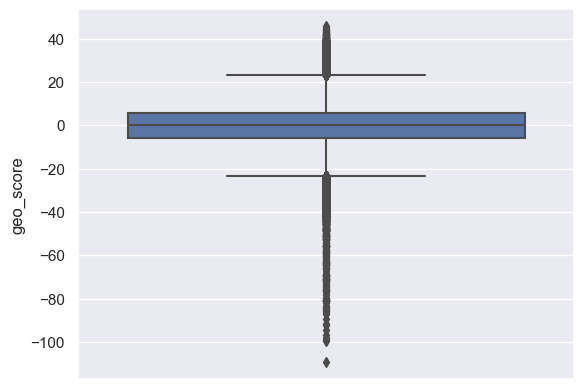

In [16]:
# check outlier for geo or not so that we can impute mean or mode:
sns.boxplot(y='geo_score',data=geo)
#Yes there is outlier so will use median

In [17]:
#filling missing value:
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())

### For qset :
__________________________________________
- qset have missing data will handle this :
- qset-> both columns are number (int,float).

In [18]:
qset.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

In [19]:
((qset.isnull().sum()/len(qset))*100).round(2)

id                      0.00
qsets_normalized_tat    7.25
dtype: float64

<Axes: ylabel='qsets_normalized_tat'>

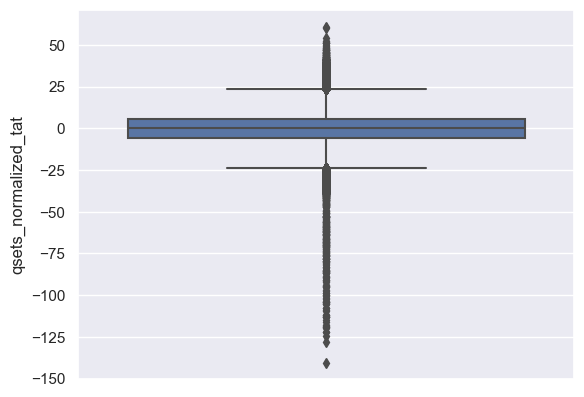

In [20]:
# check outlier for qset or not so that we can impute mean or mode:
sns.boxplot(y='qsets_normalized_tat',data=qset)
#Yes there is outlier so will use median

In [21]:
#filling missing value:
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [22]:
# check now any missing value now exist ?
print(geo.isnull().sum())
print('_'*25)
print(qset.isnull().sum())

id           0
geo_score    0
dtype: int64
_________________________
id                      0
qsets_normalized_tat    0
dtype: int64


In [23]:
# check missing value for entire data final time:

print('geo' ,geo.isnull().sum())
print('--'*15)
print('instance',instance.isnull().sum())
print('--'*15)
print('Lambda',Lambda_wts.isnull().sum())
print('--'*15)
print('qset',qset.isnull().sum())
print('--'*15)
print('train',train.isnull().sum())
print('--'*15)
print('test',test.isnull().sum())

geo id           0
geo_score    0
dtype: int64
------------------------------
instance id                 0
instance_scores    0
dtype: int64
------------------------------
Lambda Group        0
lambda_wt    0
dtype: int64
------------------------------
qset id                      0
qsets_normalized_tat    0
dtype: int64
------------------------------
train id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
------------------------------
test id                0
Group     

### ------------------------------All data missing value cleaned  ------------------------------

In [24]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [25]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


- Train and test have shapes (2,28) and (2,27) respectively.  
- Train has the target variable, but test does not, which is why it has 27 columns.  
- After merging, wherever test data appears, the target column will be null.  
- Since train has the target variable, I can easily identify which rows belong to test and which belong to train by checking for null in the target column.

In [26]:
# creating a common col in both the table so that it easier for me to..
# identify and also for merging by commom column

train['data']='train'
test['data']='test'

In [27]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [28]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [29]:
# add both the table together by row wise

all_data=pd.concat([train,test],axis=0)
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test


In [30]:
#unique value by id and group vs all data original shape of data
#replace train and test by all_data

print(f'{"*"*15},Unique Id of the cust. vs Original shape{"*"*15}')
print()
print(f"geo------>{geo['id'].nunique()} | Shape of original geo--> {geo.shape[0]}")
print('--'*15)
print(f"instance-->{instance['id'].nunique()}| Shape of original instance--> {instance.shape[0]}")
print('--'*15)
print(f"Qset-->{qset['id'].nunique()}    | Shape of original qset--> {qset.shape[0]}")
print('--'*15)
print(f"all_data-->{all_data['id'].nunique()}| Shape of original all_data--> {all_data.shape[0]}")
print('--'*15)
print()
print('***'*15)
print('--'*15)
print(f'{"*"*15},Unique group of the cust.vs Original shape{"*"*15}')
print(f"Lambda---> {Lambda_wts['Group'].nunique()}| Shape of original Lambda--> {Lambda_wts.shape[0]}")
print(f"all data (tr,test)--->{all_data['Group'].nunique()} | Shape of original all_data--> {all_data.shape[0]}")

***************,Unique Id of the cust. vs Original shape***************

geo------>284807 | Shape of original geo--> 1424035
------------------------------
instance-->284807| Shape of original instance--> 1424035
------------------------------
Qset-->284807    | Shape of original qset--> 1424035
------------------------------
all_data-->284807| Shape of original all_data--> 284807
------------------------------

*********************************************
------------------------------
***************,Unique group of the cust.vs Original shape***************
Lambda---> 1400| Shape of original Lambda--> 1400
all data (tr,test)--->1400 | Shape of original all_data--> 284807


### ******************************************************************************************************************
- After concatenating train and test into all_data, the number of rows is 284807(by unique value).
_____________________________________________________________________________________________________________
- all_data.shape[0] = 284807 >> this is the number of unique customers in my combined all_data(train+test).
- Original traxn level datasets (i.e, geo, instance, qset) have 1424035 rows-> multiple transactions/cust.
- So, I see much fewer rows in all_data compared to geo/instance/qset.
_____________________________________________________________________________________________________________
- Original traxn level datasets (geo, instance, qset) have 1424035 rows because customers can have multiple transactions.
_____________________________________________________________________________________________________________
- This difference can be confusing, as all_data has one row per customer (i have taken unique value), while traxn level data has multiple rows per customer.
_____________________________________________________________________________________________________________
- To merge correctly, I need to aggregate traxn level data per customer.This means --> in each dataset like geo, instance, and qset, I will keep only one record per customer by grouping on id.
- I can use mean (for each cust multiple tranxn and will take their on an average value) to aggregate numeric columns, so multiple transactions for the same customer become a single summarized record.
- After aggregation, the shape of these datasets will reduce from 1424035 rows to 284807 rows(1/cust).This makes them perfectly aligned with all_data, allowing easy and correct merging based on id.
______________________________________________________________________________________________________
- After aggregating, we can merge the aggregated traxn level data with all_data on id.
- Then, we merge group-level Lambda weights using the group column with a left merge to ensure all customers are preserved.
_____________________________________________________________________________________________________________
- This results in a clean dataset with one row per customer, with transaction-level and group-level features, ready for analysis and model building and futher.

In [31]:
pd.options.display.float_format = '{:.0f}'.format

print(f"for Geo:\n{geo.describe()}")
print('***************************************************')
print(f"for instance:\n{instance.describe()}")
print('***************************************************')
print(f"for qset:\n{qset.describe()}")
print('***************************************************')

for Geo:
           id  geo_score
count 1424035    1424035
mean   142403          0
std     82217          8
min         0       -109
25%     71201         -5
50%    142403          0
75%    213605          5
max    284806         46
***************************************************
for instance:
           id  instance_scores
count 1424035          1424035
mean   142403               -0
std     82217                3
min         0             -123
25%     71201               -1
50%    142403               -0
75%    213605                1
max    284806              120
***************************************************
for qset:
           id  qsets_normalized_tat
count 1424035               1424035
mean   142403                     0
std     82217                     7
min         0                  -140
25%     71201                    -5
50%    142403                     0
75%    213605                     5
max    284806                    61
***********************************

In [32]:
# aggregating the data: from the description i can conclude that both the mean and median are the same value
# if I take any one, there will be no impact. 

geo= geo.groupby('id').mean()
instance= instance.groupby('id').mean()
qset= qset.groupby('id').mean()

In [33]:
print(f"After aggregate shape of geo: {geo.shape[0]}")
print('***'*15)
print(f"After aggregate shape of instance: {instance.shape[0]}")
print('***'*15)
print(f"After aggregate shape of qset: {qset.shape[0]}")

After aggregate shape of geo: 284807
*********************************************
After aggregate shape of instance: 284807
*********************************************
After aggregate shape of qset: 284807


In [34]:
# Now the problem in Lamda and all-data on group
print(f'{"*"*15},Unique group of the cust.vs Original shape{"*"*15}')
print()
print(f"Lambda---> {Lambda_wts['Group'].nunique()}| Shape of original Lambda--> {Lambda_wts.shape[0]}")
print('***'*15)
print()
print(f"all data (tr,test)--->{all_data['Group'].nunique()} | Shape of original all_data--> {all_data.shape[0]}")

***************,Unique group of the cust.vs Original shape***************

Lambda---> 1400| Shape of original Lambda--> 1400
*********************************************

all data (tr,test)--->1400 | Shape of original all_data--> 284807


In [35]:
# merge all data and Lambda on group col prevly all_data was (284807 rows × 29 columns)

all_data=pd.merge(all_data,Lambda_wts,on='Group',how='left')
print(f"After merging all data and lambda the final shape :{all_data.shape}")

After merging all data and lambda the final shape :(284807, 30)


###### final merge:
- final merge now with all data and others (geo,ins,qset) on id (id is common in both col)
- ->prevly all_data was(284807, 30)

In [36]:
#for geo

all_data=pd.merge(all_data,geo,on='id',how='left')
print(f"After merging all data and geo the final shape from (284807, 30) to -->:{all_data.shape}")

After merging all data and geo the final shape from (284807, 30) to -->:(284807, 31)


In [37]:
#for instance

all_data=pd.merge(all_data,instance,on='id',how='left')
print(f"After merging all data and geo the final shape from (284807, 31) to -->:{all_data.shape}")

After merging all data and geo the final shape from (284807, 31) to -->:(284807, 32)


In [38]:
#for qset

all_data=pd.merge(all_data,qset,on='id',how='left')
print(f"After merging all data and geo the final shape from (284807, 32) to -->:{all_data.shape}")

After merging all data and geo the final shape from (284807, 32) to -->:(284807, 33)


In [39]:
print(f"Misiing value in all_data : {all_data.isnull().sum().sum()}")
print('**'*20)
print(f"is original test row count same as number of null target values in all_data?: {test.shape[0]==all_data.isnull().sum().sum()}")

Misiing value in all_data : 56962
****************************************
is original test row count same as number of null target values in all_data?: True


### Utilise automated EDA packages to comprehend the data->

###### SweetViz:

In [40]:
# Patch Sweetviz compatibility just for bypass error
#if not hasattr(np, "VisibleDeprecationWarning"):
#    np.VisibleDeprecationWarning = Warning

import sweetviz as sv
report = sv.analyze(all_data)
report.show_html("EDA_sweetViz_Banking_ATM_Fraudulent_ Detection_eda.html")

                                             |      | [  0%]   00:00 -> (? left)

Report EDA_sweetViz_Banking_ATM_Fraudulent_ Detection_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Not actually its a missing value:
- the missing values in all_data correspond to the target column for test rows.
- when concatenating train and test:
- train has target values >> no nulls.
- test has no target >> becomes null in all_data after concat train and test.
- therefore, the null target values indicate which rows originally belonged to test.
- so will keep it as it is and while spliting will separate where target=Nan


In [41]:
# splitting the data 

train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [42]:
train.shape

(227845, 33)

In [43]:
test.shape

(56962, 33)

#### Pre processing on Train and test:
###### ___________________________________


In [44]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [45]:
# id, data need to remove

train= train.drop(['id','data'],axis=1)

In [46]:
train.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [47]:
#also need to remove unwanted col id,data,target
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [48]:
test=test.drop(['id','Target','data'],axis=1)
test.shape

(56962, 30)

In [49]:
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [50]:
# now check any missing data 
print(f"Test missing : {test.isnull().sum().sum()}")
print(f"Train missing : {train.isnull().sum().sum()}")

Test missing : 0
Train missing : 0


In [51]:
# Converting string to category:

test['Group'].info
test['Group']=test['Group'].astype('category')
test['Group']=test['Group'].cat.codes
test['Group'].info()

<class 'pandas.core.series.Series'>
Index: 56962 entries, 227845 to 284806
Series name: Group
Non-Null Count  Dtype
--------------  -----
56962 non-null  int16
dtypes: int16(1)
memory usage: 556.3 KB


In [52]:
train['Group'].info
train['Group']=train['Group'].astype('category')
train['Group']=train['Group'].cat.codes
train['Group'].info()

<class 'pandas.core.series.Series'>
Index: 227845 entries, 0 to 227844
Series name: Group
Non-Null Count   Dtype
--------------   -----
227845 non-null  int16
dtypes: int16(1)
memory usage: 2.2 MB


In [53]:
# check any other type casting required

print(f"for Training set:\n{train.info()}")
print('***'*20)
print(f"for Testing set:\n{test.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Group                 227845 non-null  int16  
 1   Per1                  227845 non-null  float64
 2   Per2                  227845 non-null  float64
 3   Per3                  227845 non-null  float64
 4   Per4                  227845 non-null  float64
 5   Per5                  227845 non-null  float64
 6   Per6                  227845 non-null  float64
 7   Per7                  227845 non-null  float64
 8   Per8                  227845 non-null  float64
 9   Per9                  227845 non-null  float64
 10  Dem1                  227845 non-null  float64
 11  Dem2                  227845 non-null  float64
 12  Dem3                  227845 non-null  float64
 13  Dem4                  227845 non-null  float64
 14  Dem5                  227845 non-null  float64
 15  Dem6 

In [54]:
# splitting into x & y from training

x=train.drop(['Target'],axis=1)
y=train['Target']

In [55]:
# splitting the data into train and testing:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [56]:
y_train.value_counts()

Target
0    181961
1       315
Name: count, dtype: int64

In [57]:
y_test.value_counts()

Target
0    45490
1       79
Name: count, dtype: int64

# Building Model:

###### 1. Random Forest Model:-
----------------------------

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)

In [60]:
rf_model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

In [62]:
from sklearn.metrics import classification_report,accuracy_score

In [63]:
print('Training acc: ',accuracy_score(y_train,y_pred_train))
print('***********************************')
print('Testing acc: ',accuracy_score(y_test,y_pred_test))

Training acc:  1.0
***********************************
Testing acc:  0.9994513814215804


In [64]:
print('Training acc: ',classification_report(y_train,y_pred_train))
print('*************************************************************')
print('Test acc: ',classification_report(y_test,y_pred_test))

Training acc:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

*************************************************************
Test acc:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.72      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569



- based on the accuracy (training  100% and test  99% +), the fact that 
- training accuracy > test accuracy suggests there may be some overfitting. 
- to address this, i should use cross val to better estimate the model performance.

#### Cross Validation***: (As Overfitting Isuues)

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
training_cv=cross_val_score(rf_model, x_train, y_train, cv=10,n_jobs=-1)

/opt/anaconda3/envs/ml_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/ml_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/ml_env/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin t

In [67]:
print('Cross Val-Training accuracy',training_cv.mean())
print()
print('*'*25)
print()
print('Cross Val-Training Standard dev: ',training_cv.std())
print()
print('*'*25)
print('Test accuracy : ',accuracy_score(y_test,y_pred_test))

Cross Val-Training accuracy 0.9995336730040639

*************************

Cross Val-Training Standard dev:  0.00014772432148616577

*************************
Test accuracy :  0.9994513814215804


#### from above CV:
###### ********************************************************************************************************************************************************
- model not overfitting -> train & test almost identical.
- but technically its over fitting (train > test) difference is less than 0.01%, 
 which is statistically negligible or almost zero
- low std dev stable & consistent across all folds (from the mean or Cross Val-Training accuracy 99.95%)
- no further tuning needed unless for interpretability or efficiency

###### ______________________________________________________________________________________________________________
#### Final Prediction for [test] -> data :

In [130]:
final_test_results=rf_model.predict(test)

In [131]:
final_test_results

array([0., 0., 0., ..., 0., 0., 0.])

In [132]:
test[0:1]

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
227845,277,-0,2,0,-0,1,0,1,1,1,...,1,1,1,1,1,-250,1,0,-0,-0


In [133]:
final_test_results_df = pd.DataFrame(final_test_results, columns=['Target'])
final_test_results_df

,Target
0,0
1,0
2,0
3,0
4,0
...,...
56957,0
56958,0
56959,0
56960,0


In [134]:
test_orig = pd.read_csv('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Banking_/Data & Data_Dictionary & releted/test_share.csv')

In [135]:
test_reset = test.reset_index(drop=True)
final_test_results_df.reset_index(drop=True, inplace=True)
test_orig_reset = test_orig.reset_index(drop=True)

In [136]:
final_test_data = pd.concat([test_reset, final_test_results_df], axis=1)
final_test_data

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat,Target
0,277,-0,2,0,-0,1,0,1,1,1,...,1,1,1,1,-250,1,0,-0,-0,0
1,180,1,1,1,0,1,0,1,1,1,...,1,1,1,1,-250,0,0,-1,-1,0
2,231,1,1,1,1,1,1,1,1,1,...,1,1,1,1,-248,0,1,0,-0,0
3,485,1,0,1,1,0,1,0,1,1,...,0,0,1,1,-223,2,-2,0,0,0
4,504,1,0,0,1,0,1,0,1,1,...,1,1,1,1,-196,2,-2,-0,-0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,11,1,1,1,1,1,0,1,1,1,...,1,1,1,1,-250,-0,-0,-1,0,0
56958,569,1,1,0,1,1,1,0,1,1,...,1,1,1,1,-249,-2,0,-0,0,0
56959,765,1,0,1,0,0,0,1,1,0,...,1,1,1,1,-231,0,-1,1,-0,0
56960,163,1,1,0,1,1,0,1,1,1,...,1,1,1,1,-246,-1,0,-1,1,0


In [138]:
# adding id to the df so that data will be same as original with predicted lebel:

final_test_data.insert(0, 'id', test_orig_reset['id'])


ValueError: cannot insert id, already exists

In [139]:
final_test_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat,Target
0,146574,277,-0,2,0,-0,1,0,1,1,...,1,1,1,1,-250,1,0,-0,-0,0
1,268759,180,1,1,1,0,1,0,1,1,...,1,1,1,1,-250,0,0,-1,-1,0


In [140]:
#final saving test data
final_test_data.to_csv('final_test_with_pred_bank_atmFraud.csv', index=False)

#         --------------------------- E N D ---------------------------           

In [142]:
# for pycaret automation will use this

all_data.to_csv('all_data_cleaned_data_bankFraud.csv',index=False)